# Advanced Jupyter Notebook Tutorial

Today we will cover some more advanced math concepts in Jupyter notebooks.  Namely, we will discuss
1. Integration

    This includes a discussion of analtytic vs numeric integration and integral tables.
    
    
2. Matrix manipulations

    Eigenvalue/eigenvector problems etc.
       


## Integration

### Indefinite integration

Consider $f(x) = \int x^2 dx$, can we write $f(x)$ in a different way?  Sure, if we know the antiderivative of the integrand we can write out f(x) as the indefinite integral.  Namely, $f(x) = \int x^2 dx = \frac{x^3}{3} + C$ for arbitrary constant $C$.

What are the indefinite integrals of the following

1. $\int x^3 dx$
2. $\int e^{x} dx$
3. $\int (x^4 + 4x) dx$
4. $\int \frac{1}{x} dx$

Coding does not help with indefinite integration.  These need to be derived analytically.  Some common indefinite integrals are tabulated here: http://integral-table.com/

### Definite integration

Definite integration is when we want to evaluate the integral of a function (integrand) over a finite domain.  E.g. $\int_0^4 x^2dx$.  If the domain is static (i.e. $0$ to $4$ instead of $0$ to $y$) and integration is performed over all variables in the integrand, then the result of a definite integral will be a number (as opposed to a function of x in the case of indefinite integrals).  This may all sound esoteric so let's consider some examples.

1. $\int_0^4 x^2 dx$

    $ = \left[ \frac{x^3}{3} + C\right]_0^4$   In this step I replace $\int x^2 dx$ with the indefinite integral 
    
    $ = \left[\frac{4^3}{3} + C\right] - \left[\frac{0^3}{3} + C\right] $  Evaluate the indefinite integral at the limits
    
    $ = \frac{64}{3} + C - 0 - C$  Algebra
    
    $ = \frac{64}{3}$

Notice that the arbitrary constant, $C$, cancels out when you subtract the value of the indefinite integral at the lower bound from that at the upper bound.  This holds true in general thus we typically don't include the arbitrary constant when evaluating the indefinite integral at the bounds of integration.  Let's do another example:

1. $\int_0^4 x^2 dx$

    $ = \left[ \frac{x^3}{3} + C\right]_0^4$   In this step I replace $\int x^2 dx$ with the indefinite integral 
    
    $ = \left[\frac{4^3}{3} + C\right] - \left[\frac{0^3}{3} + C\right] $  Evaluate the indefinite integral at the limits
    
    $ = \frac{64}{3} + C - 0 - C$  Algebra
    
    $ = \frac{64}{3}$

In [1]:
64/3.

21.333333333333332

### Numeric Definite Integration

Numeric integration can only be used for definite integrals.  It is a way of approximating the analytic solution and good approaches to this will converge to that solution in certain limits.  The most common example of this is rectangular integration (or the midpoint rule).  For this method, we approximate the area under a curve as the sum of the areas of abutting rectangles that are the height of the function at the midpoint of the rectangle.  These rectangles are of a specified width and the value of the summation converges to the real solution as the width of the rectangles decrease.

<BarContainer object of 16 artists>

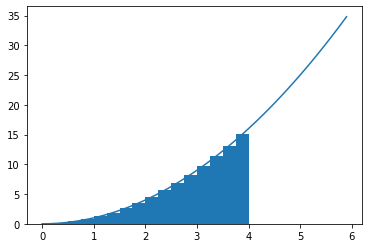

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.arange(0,6,0.1)
xInt = np.arange(0.125,4,0.25)
plt.plot(x,np.power(x,2))
plt.bar(xInt,np.power(xInt,2),0.25)

We can compute the sum of these areas using a for loop in python.

In [3]:
rectangleSum = 0.0
rectangleWidth = 0.01
minX = 0.00
maxX = 4.00
nRectangles = int( (maxX-minX)/rectangleWidth )
print("Number of rectangles:", nRectangles)

Number of rectangles: 400


In [4]:
rectangleSum = 0.0
for i in range(nRectangles):
    areaOfRectangle =  rectangleWidth * (minX + (i+0.5)*rectangleWidth)**2
    rectangleSum += areaOfRectangle
print(rectangleSum)

21.33330000000001


There are a vareity of other, more accurate, numerical integration techniques including the trapezoid rule, Simpson's rule and Gaussian quadrature. We will not go into these in detail.  Instead we will use scipy packages for these.

In [5]:
from scipy import integrate
def f(x):
    return x*x
dx = 0.01
xInt = np.arange(0.5*dx,4,dx)
print("Trapezoid rule:",integrate.trapz(np.power(xInt,2),x=xInt))
print("Simpson's rule:",integrate.simps(np.power(xInt,2),x=xInt))
print("Gaussian quadrature :",integrate.quad(f,0,4)[0])

Trapezoid rule: 21.25349974999999
Simpson's rule: 21.253433416666653
Gaussian quadrature : 21.333333333333336


## More on Matrices

In [6]:
# in this code cell we will import numpy
import numpy as np

### Defining a matrix

We can define a matrix in a number of ways.  The first is to cast a list of lists as a numpy matrix.

In [7]:
# defining a matrix - these are just 2D arrays
a = np.matrix([[1,2],[3,4]])
b = np.matrix([[1,2],[3,4]],dtype=float)
c = np.matrix([[5,6],[-1,0]],dtype=float)
print(a)
print(b)
print(c)

[[1 2]
 [3 4]]
[[1. 2.]
 [3. 4.]]
[[ 5.  6.]
 [-1.  0.]]


We can also declare the matrices and populate them element by element.

In [8]:
a = np.empty((3,3),dtype=float)   # declare an empty matrix of size 3x3 and type float
for i in range(3):
    for j in range(3):
        a[i,j] = i+j              # place the value of i+j into the i,jth element of the matrix
print(a)

[[0. 1. 2.]
 [1. 2. 3.]
 [2. 3. 4.]]


Elements in a matrix can be accessed by square brackets and the integer indeces

In [9]:
print("a[0,0]=",a[0,0])
print("a[1,2]=",a[1,2])

a[0,0]= 0.0
a[1,2]= 3.0


### Matrix manipulations

Numpy has a lot of built in functions to manipulate or assess a matrix.  

In [10]:
# trace
print("Tr(a)=",np.trace(a))
# determinant
print("|a|=det(a)=",np.linalg.det(a))
# transpose
print("a^T=",a.T)

Tr(a)= 6.0
|a|=det(a)= 0.0
a^T= [[0. 1. 2.]
 [1. 2. 3.]
 [2. 3. 4.]]


More complicated matrix manipulations such as inverses and diagonalizations can also be done

In [11]:
# inverse
np.linalg.inv(a)

LinAlgError: Singular matrix

Note that not all matrices are invertible!

In [15]:
# eigenvalues and eigenvectors
e,v = np.linalg.eig(a)
print("Eigenvalues:",e)
print("Eigenvectors:",v)

Eigenvalues: [ 6.87298335e+00 -8.72983346e-01 -7.69038628e-16]
Eigenvectors: [[-0.30646053 -0.8598926   0.40824829]
 [-0.54384383 -0.19382266 -0.81649658]
 [-0.78122713  0.47224729  0.40824829]]
